In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
#import library 

import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd  

In [ ]:
#Import data
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prak-apm3/Gaa.csv')  
x = dataset.iloc[:,[6,7]].values
y = dataset.iloc[:,1].values

In [ ]:
#lihat data
dataset.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,0,18,5,College,Operations,2,42363,9938
1,Software Engineer,1,21,5,College,Management,5,108476,11128
2,Warehouse Associate,0,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,1,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,1,26,5,Masters,Engineering,5,99464,9319


In [ ]:
#membagi data ke dalam data training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=5)

In [ ]:
#Feature Scaling  

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) #menjaga nilai dalam range
x_test = sc.fit_transform(x_test)

In [ ]:
#membuat naive bayes pada Training set  

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
#melakukan prediksi hasi test set

y_pred = classifier.predict(x_test)

In [ ]:
#melakukan confusian matrix dan akurasi score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

ac = accuracy_score(y_test,y_pred)
print(ac)

[[54 66]
 [32 98]]
0.608


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


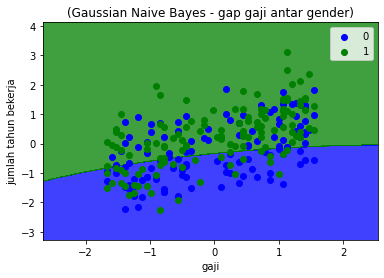

In [ ]:
#melakukan visualisasi hasil tes set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green',)))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('(Gaussian Naive Bayes - gap gaji antar gender)')
plt.xlabel('gaji')
plt.ylabel('jumlah tahun bekerja')
plt.legend()
plt.show()